In [3]:
import PIL
from PIL import Image
from PIL.TiffTags import TAGS
import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [4]:
def frameanalyzer(mydir):
    abstimes = []
    totframes = 0

    root = tk.Tk()
    root.withdraw()
    files = ([x for x in mydir.iterdir() if x.is_file()])

    for filename in files:

        img = PIL.Image.open(filename)
        meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}
        img.close()

        time = str(meta_dict['DateTime'][0])[-12:-1]
        abstime = float(time[0:2])*60*60 + float(time[3:5])*60 + float(time[6:11])
        #print(abstime)
        abstimes.append(abstime)

        totframes += 1

    difference = [abs(j - i) for i, j in zip(abstimes[: -1], abstimes[1 :])] 

    #remove outliers
    a = np.array(difference)
    upper_quartile = np.percentile(a, 99)
    lower_quartile = np.percentile(a, 1)
    IQR = (upper_quartile - lower_quartile) * 2
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    difference_notoutliers = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            difference_notoutliers.append(y)

    outliers = len(difference) - len(difference_notoutliers)

    #create results directory

    newdirectory = str(mydir)+'-results'
    newmydir = Path(newdirectory)
    newmydir.mkdir(exist_ok=True)        



    x = np.arange(1,totframes)
    #Save
    data = {'Frame':x,'Difference':difference}
    df = pd.DataFrame(data)
    df.to_csv(newmydir/'frame_rates.csv',index=False)

    #Print
    result = {'Directory':[mydir],'Mean':[np.around(np.mean(difference_notoutliers),2)],'SD':[np.around(np.std(difference_notoutliers),2)],'Frames':[totframes-1],'Outliers':[outliers],'MeanWOutliers':[np.around(np.mean(difference),2)],'SDWOutliers':[np.around(np.std(difference),2)]}
    df = pd.DataFrame(result)
    #df.to_csv(newmydir/'frame_rates_avg.csv',index=False)

    #Plot
    x = np.arange(1,totframes-outliers)

    fig, ax = plt.subplots(figsize=(28, 3))
    ax.plot(x, difference_notoutliers)
    plt.xlabel('Frame', fontsize = 25)
    plt.ylabel('Time (s)', fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.tight_layout()
    fig.savefig(newmydir/'frame_rates_plot.pdf')
    plt.clf()
    
    return df

In [5]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
parentdir = Path(askdirectory)

In [6]:
folders = [x for x in parentdir.iterdir() if x.is_dir()]
folders = [i for i in folders if (str(i)[-1:] == 'M') == True]
folders

[WindowsPath('D:/Sofia/2020-03-11_DCX_WT_P191R/CH12_tub05uM_typeWT_DCX100nM'),
 WindowsPath('D:/Sofia/2020-03-11_DCX_WT_P191R/CH13_tub05uM_typeP191R_DCX100nM'),
 WindowsPath('D:/Sofia/2020-03-11_DCX_WT_P191R/CH21_tub05uM_typeNone_DCX000nM')]

In [7]:
df = frameanalyzer(folders[0])
for i in folders[1:]:
    df0 = frameanalyzer(i)
    df = df.append(df0)
df.to_csv(parentdir/'frame_rates_avg.csv',index=False)
df

,Directory,Mean,SD,Frames,Outliers,MeanWOutliers,SDWOutliers
0,D:\Sofia\2020-03-11_DCX_WT_P191R\CH12_tub05uM_...,5.78,0.06,500,3,6.20,9.11
0,D:\Sofia\2020-03-11_DCX_WT_P191R\CH13_tub05uM_...,5.82,0.09,500,1,6.55,16.32
0,D:\Sofia\2020-03-11_DCX_WT_P191R\CH21_tub05uM_...,5.82,0.08,500,2,5.94,2.65


<Figure size 2016x216 with 0 Axes>

<Figure size 2016x216 with 0 Axes>

<Figure size 2016x216 with 0 Axes>

In [82]:
parentdir

WindowsPath('E:/Sofia/2019-06-10_DIC')

E:\Sofia\2019-06-10_DIC\CH12_08uM-IGNORED
14.51 +/- 153.88
6.65 +/- 0.15 ignoring 3 outliers


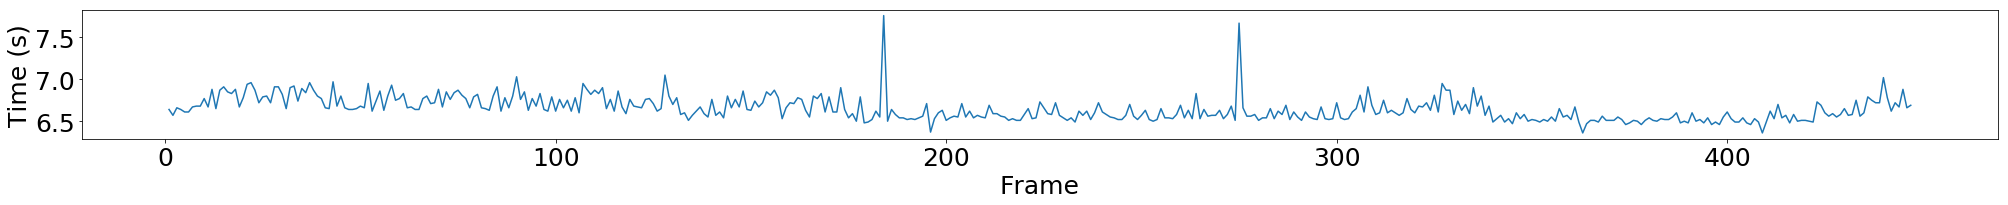

In [49]:
#def frameanalyzer()
abstimes = []
totframes = 0

root = tk.Tk()
root.withdraw()
mydir = folders[0]
files = ([x for x in mydir.iterdir() if x.is_file()])

for filename in files:

    img = PIL.Image.open(filename)
    meta_dict = {TAGS[key] : img.tag[key] for key in img.tag}
    img.close()

    time = str(meta_dict['DateTime'][0])[-12:-1]
    abstime = float(time[0:2])*60*60 + float(time[3:5])*60 + float(time[6:11])
    #print(abstime)
    abstimes.append(abstime)

    totframes += 1
    
difference = [abs(j - i) for i, j in zip(abstimes[: -1], abstimes[1 :])] 

#remove outliers
a = np.array(difference)
upper_quartile = np.percentile(a, 99)
lower_quartile = np.percentile(a, 1)
IQR = (upper_quartile - lower_quartile) * 10
quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
difference_notoutliers = []
for y in a.tolist():
    if y >= quartileSet[0] and y <= quartileSet[1]:
        difference_notoutliers.append(y)

outliers = len(difference) - len(difference_notoutliers)

#create results directory

newdirectory = askdirectory+'-results'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)        



x = np.arange(1,totframes)
#Save
data = {'Frame':x,'Difference':difference}
df = pd.DataFrame(data)
df.to_csv(newmydir/'frame_rates.csv',index=False)

#Print
result = {'Directory':[mydir],'Mean':[np.around(np.mean(difference_notoutliers),2)],'SD':[np.around(np.std(difference_notoutliers),2)],'Frames':[totframes-1],'Outliers':[outliers],'MeanWOutliers':[np.around(np.mean(difference),2)],'SDWOutliers':[np.around(np.std(difference),2)]}
df = pd.DataFrame(result)
df.to_csv(newmydir/'frame_rates_avg.csv',index=False)

#Plot
x = np.arange(1,totframes-outliers)

fig, ax = plt.subplots(figsize=(28, 3))
ax.plot(x, difference_notoutliers)
plt.xlabel('Frame', fontsize = 25)
plt.ylabel('Time (s)', fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tight_layout()
fig.savefig(newmydir/'frame_rates_plot.pdf')

printstring = str(np.around(np.mean(difference),2)) + ' +/- ' + str(np.around(np.std(difference),2))
printstring_notoutliers = str(np.around(np.mean(difference_notoutliers),2)) + ' +/- ' + str(np.around(np.std(difference_notoutliers),2)) + ' ignoring ' + str(len(difference) - len(difference_notoutliers)) + ' outliers'

textoutput = str(mydir) + '\n' + printstring + '\n'  + printstring_notoutliers

#outputpath = mydir.parents[0]/'frame_rate_avg.txt'

#with open(outputpath, "w") as text_file:
#    text_file.write(textoutput)
    
print(textoutput)

4.31 +/- 0.02 seconds per frame


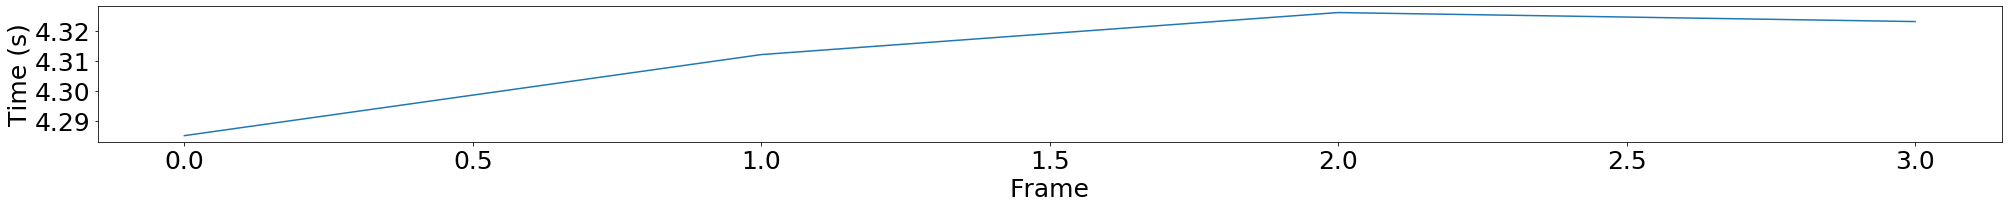

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import exifread

totframes = 0

myfile = os.path.join('C:/Users/brouhardlab/Desktop/atto and ckap2 4 sec #2.tif')
mydir = os.path.dirname(myfile)

f = open(myfile, 'rb')
tags = exifread.process_file(f)

abstimes = []

#for n in np.concatenate((np.arange(0,8), np.arange(15,25), np.arange(30,40)), axis = 0):
for n in np.arange(0,8):
    
    try:
        
        text = 'IFD ' + str(n) + ' DateTime'

        minutes = float(str(tags[text])[-6:])
        hour2min = int(str(tags[text])[-9:-7])*60

        time = hour2min + minutes

        abstimes.append(time)

        totframes += 1
        
    except:
        
        pass
    
difference = [j - i for i, j in zip(abstimes[: -1], abstimes[1 :])]
#difference = [i for i in difference if i < 4.5]

x = np.arange(0,len(difference))

fig, ax = plt.subplots(figsize=(28, 3))
ax.plot(x, difference)
plt.xlabel('Frame', fontsize = 25)
plt.ylabel('Time (s)', fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tight_layout()
#fig.savefig(os.path.join(mydir, '..','frame_rates_plot.jpg'))

#data = {'Frame':x,'Difference':difference}
#df = pd.DataFrame(data)
#df.to_csv(path_or_buf = os.path.join(mydir, '..','frame_rates.csv'),index=False)

printstring = str(np.around(np.mean(difference),2)) + ' +/- ' + str(np.around(np.std(difference),2))

print(printstring + ' seconds per frame')

#outputpath = os.path.join(mydir, '..','frame_rate_avg.txt')

#with open(outputpath, "w") as text_file:
#    text_file.write(printstring)
